# Analysis of Structured Animation Result

With Acc, there is no supporting arguments.  It suggests that Acc is not tested meaningfully. 

##  Thurstone-Mosteller Least Squares Method

### Prerequisite 
The required library will be loaded. 

In [29]:
import scipy.stats
import numpy as np
import pandas as pd


### Data input
Here, we will load the dataset.

In [48]:

labelOrder = {'SS':0,'SL':1,'SP':2,'DS':3,'DL':4,'DP':5}
labels = ['SS','SL','SP','DS','DL','DP']

originalData  = pd.read_csv('logs.csv',sep=';')

result = originalData.groupby('tasktype').sum()

result = result.drop('participant',1)

print result

           SS   SL   SP   DS   DL   DP
tasktype                              
DLDS        0    0    0  206   96    0
DPDL        0    0    0    0  100  203
DPDS        0    0    0  128    0  174
SLDP        0  100    0    0    0  196
SLDS        0  132    0  162    0    0
SLSS      137  165    0    0    0    0
SPDL        0    0  142    0  159    0
SPDS        0    0  103  198    0    0
SPSL        0  151  148    0    0    0
SSDL      110    0    0    0  190    0
SSDP       94    0    0    0    0  209
SSSP      143    0  159    0    0    0


### Trial 1 - Using same strength for unknown values

Unfortunately, the pairwise ranking method assumes all 15 comparison value is available.  However in our experiments the dynamic and static property of same visual variable, such as DS vs SS is not available.   I used two different assumptions to get the following ranking. 

**Assumption** -  When dynamic property and static property is same. 

Counts is a n-by-n matrix where 

Counts[i,j] = # people who prefer option i over option j

N is total number of experiment for each comparision



In [43]:
Counts = np.zeros([6,6])

for i in range(6):
    for j in range(6):
        if labels[i]+ labels[j] in result.index:
            Counts[i,j] = result.loc[labels[i]+labels[j]][labels[i]]
        elif labels[j]+ labels[i] in result.index:
            Counts[i,j] = result.loc[labels[j]+labels[i]][labels[i]]
        else:
            Counts[i,j] = 1

print Counts

[[   1.  137.  143.    1.  110.   94.]
 [ 165.    1.  151.  132.    1.  100.]
 [ 159.  148.    1.  103.  142.    1.]
 [   1.  162.  198.    1.  206.  128.]
 [ 190.    1.  159.   96.    1.  100.]
 [ 209.  196.    1.  174.  203.    1.]]


In [31]:

N = Counts + Counts.T


P = Counts / (N + (N==0))

P[np.eye(6)>0] = 0.5

Z = scipy.stats.norm.ppf(P)

S = (-1) * np.mean(Z, axis=0)

print S



[-0.16980069 -0.06959528 -0.07057606  0.13604707 -0.08365265  0.25757761]


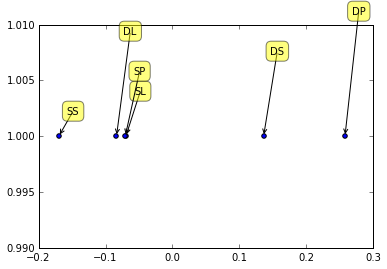

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

y = np.ones(6)

plt.scatter(S, y)
for index, x in enumerate(S):
    plt.annotate( labels[index],
                 xy=(x, 1), xytext = (20,20+20*index),textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

### Trial 2 : Approximating unknown results by ratio of known values

For example, we approximate the DL vs SL using SP 

DL : SP = 159:142

SP : SL = 148:151

DL : SL = 159 x 148 : 142 x 151

In [54]:
Counts[4,1] = np.sqrt(Counts[4,2] * Counts[2,1])
Counts[1,4] = np.sqrt(Counts[1,2] * Counts[2,4])

print Counts[4,1] 
print Counts[1,4]
print Counts 


153.401434152
146.430871062
[[   1.          137.          143.            1.          110.           94.        ]
 [ 165.            1.          151.          132.          146.43087106
   100.        ]
 [ 159.          148.            1.          103.          142.            1.        ]
 [   1.          162.          198.            1.          206.          128.        ]
 [ 190.          153.40143415  159.           96.            1.          100.        ]
 [ 209.          196.            1.          174.          203.            1.        ]]


In [55]:

N = Counts + Counts.T


P = Counts / (N + (N==0))

P[np.eye(6)>0] = 0.5

Z = scipy.stats.norm.ppf(P)

S2 = (-1) * np.mean(Z, axis=0)

print S2


[-0.16980069 -0.07445218 -0.07057606  0.13604707 -0.07879574  0.25757761]


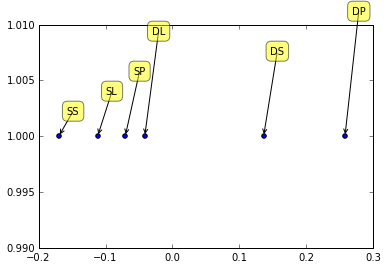

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

y = np.ones(6)

plt.scatter(S, y)
for index, x in enumerate(S):
    plt.annotate( labels[index],
                 xy=(x, 1), xytext = (20,20+20*index),textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()